In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics.pairwise import cosine_similarity

# Загрузка изображения
def load_image(img_path):
  image = Image.open(img_path)
  return np.array(image)

# Инициализация кластеров
def initialize_clusters(points, k):
  return points[np.random.randint(points.shape[0], size=k), :]

# Евклидовое расстояние
def assign_clusters_eucledian(points, centroids):
  distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
  return np.argmin(distances, axis=0)

# Манхэттенское расстояние
def assign_clusters_manhattan(points, centroids):
  distances = np.abs(points - centroids[:, np.newaxis]).sum(axis = 2)
  return np.argmin(distances, axis=0)

# Расстояние Чебышева
def assign_clusters_cheb(points, centroids):
  distances = (np.abs(points - centroids[:, np.newaxis])).max(axis=2)
  return np.argmin(distances, axis=0)

# Косинусное сходство
def assign_clusters_cos(points, centroids):
  distances = ((points * centroids[:, np.newaxis])).sum(axis = 2)/(np.sqrt(np.power(points, 2).sum()) * np.sqrt(np.power(centroids[:, np.newaxis], 2).sum()))
  return np.argmax(distances, axis=0)

# Обновление центров
def update_centroids(points, labels, k):
    new_centroids = np.array([points[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

# Метод К-средних
def k_means(points, k, max_iters=100, distance = "e"):
    centroids = initialize_clusters(points, k)
    for _ in range(max_iters):
        if (distance == "e"):
          labels = assign_clusters_eucledian(points, centroids)
        if (distance == "m"):
          labels = assign_clusters_manhattan(points, centroids)
        if (distance == "cheb"):
          labels = assign_clusters_cheb(points, centroids)
        if (distance == "cos"):
          labels = assign_clusters_cos(points, centroids)
        new_centroids = update_centroids(points, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

# Сегментация
def segment_image(image_path, k=3, max_iters=100, distance = "e"):
  img = load_image(image_path)
  h, w, d = img.shape
  points = img.reshape(h * w, d)
  centroids, labels = k_means(points, k, max_iters, distance)
  segmented_img = centroids[labels].reshape(h,w,d).astype(np.uint8)

  return segmented_img

# Библиотка
def segment_cv2(image_path, k=3, max_iters=100):
  sample_image = cv2.imread(image_path)
  img = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)
  twoDimage = img.reshape((-1,3))
  twoDimage = np.float32(twoDimage)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  ret,label,center=cv2.kmeans(twoDimage,k,None,criteria,max_iters,cv2.KMEANS_PP_CENTERS)
  center = np.uint8(center)
  res = center[label.flatten()]
  return res.reshape((img.shape))


Text(0.5, 1.0, 'Библиотека')

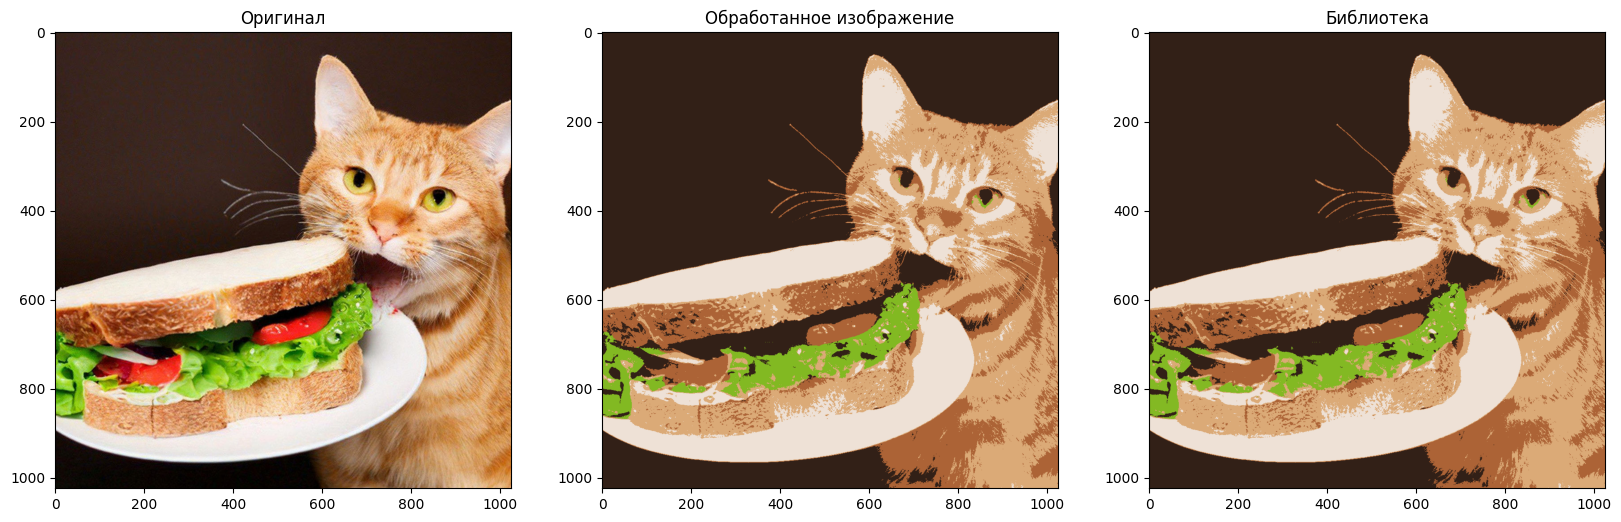

In [4]:
img_path = "11.jpg"
k = 5
max_iter = 50

fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 3, 1)
plt.imshow(Image.open(img_path))
plt.title("Оригинал")

segm = segment_image(img_path, k, max_iter, distance = "e")
fig.add_subplot(1, 3, 2)
plt.imshow(segm)
plt.title("Обработанное изображение")

segm_cv2 = segment_cv2(img_path, k, max_iter)
fig.add_subplot(1, 3, 3)
plt.imshow(segm_cv2)
plt.title("Библиотека")